In [3]:
import pandas as pd
df_event = pd.read_pickle('event_table_training.p')
df_event['isReturned'].value_counts()

isReturned
1    757227
0    611906
Name: count, dtype: int64

In [4]:
757227/(757227 + 611906)

0.5530704467717892

In [6]:
import math

-(0.55*math.log(0.55) + 0.45*math.log(0.45))

0.6881388137135884

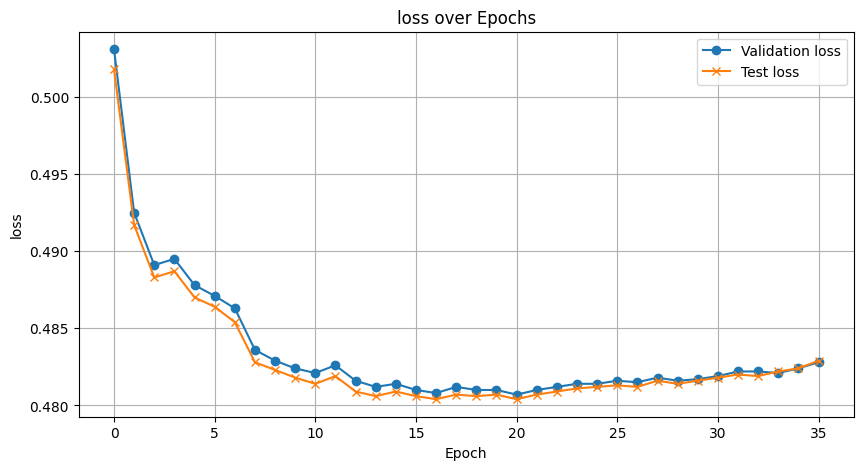

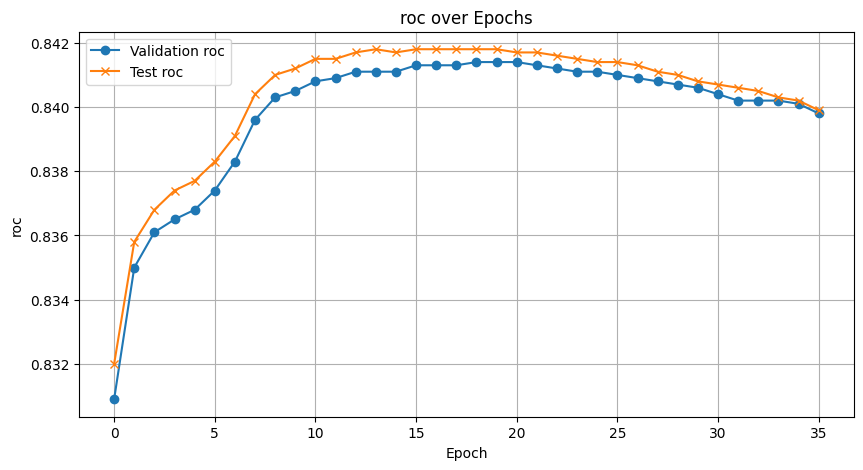

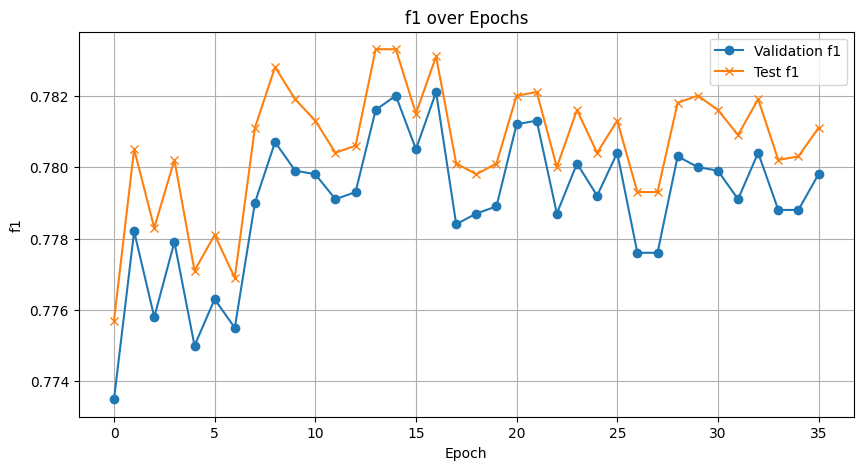

In [7]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Твой лог в виде строки
log_data = """
[epoch] 0   | val: loss=0.5031 roc_auc=0.8309 f1=0.7735 | test: loss=0.5018 roc_auc=0.8320 f1=0.7757
[epoch] 1   | val: loss=0.4925 roc_auc=0.8350 f1=0.7782 | test: loss=0.4917 roc_auc=0.8358 f1=0.7805
[epoch] 2   | val: loss=0.4891 roc_auc=0.8361 f1=0.7758 | test: loss=0.4883 roc_auc=0.8368 f1=0.7783
[epoch] 3   | val: loss=0.4895 roc_auc=0.8365 f1=0.7779 | test: loss=0.4887 roc_auc=0.8374 f1=0.7802
[epoch] 4   | val: loss=0.4878 roc_auc=0.8368 f1=0.7750 | test: loss=0.4870 roc_auc=0.8377 f1=0.7771
[epoch] 5   | val: loss=0.4871 roc_auc=0.8374 f1=0.7763 | test: loss=0.4864 roc_auc=0.8383 f1=0.7781
[epoch] 6   | val: loss=0.4863 roc_auc=0.8383 f1=0.7755 | test: loss=0.4854 roc_auc=0.8391 f1=0.7769
[epoch] 7   | val: loss=0.4836 roc_auc=0.8396 f1=0.7790 | test: loss=0.4828 roc_auc=0.8404 f1=0.7811
[epoch] 8   | val: loss=0.4829 roc_auc=0.8403 f1=0.7807 | test: loss=0.4823 roc_auc=0.8410 f1=0.7828
[epoch] 9   | val: loss=0.4824 roc_auc=0.8405 f1=0.7799 | test: loss=0.4818 roc_auc=0.8412 f1=0.7819
[epoch] 10  | val: loss=0.4821 roc_auc=0.8408 f1=0.7798 | test: loss=0.4814 roc_auc=0.8415 f1=0.7813
[epoch] 11  | val: loss=0.4826 roc_auc=0.8409 f1=0.7791 | test: loss=0.4819 roc_auc=0.8415 f1=0.7804
[epoch] 12  | val: loss=0.4816 roc_auc=0.8411 f1=0.7793 | test: loss=0.4809 roc_auc=0.8417 f1=0.7806
[epoch] 13  | val: loss=0.4812 roc_auc=0.8411 f1=0.7816 | test: loss=0.4806 roc_auc=0.8418 f1=0.7833
[epoch] 14  | val: loss=0.4814 roc_auc=0.8411 f1=0.7820 | test: loss=0.4809 roc_auc=0.8417 f1=0.7833
[epoch] 15  | val: loss=0.4810 roc_auc=0.8413 f1=0.7805 | test: loss=0.4806 roc_auc=0.8418 f1=0.7815
[epoch] 16  | val: loss=0.4808 roc_auc=0.8413 f1=0.7821 | test: loss=0.4804 roc_auc=0.8418 f1=0.7831
[epoch] 17  | val: loss=0.4812 roc_auc=0.8413 f1=0.7784 | test: loss=0.4807 roc_auc=0.8418 f1=0.7801
[epoch] 18  | val: loss=0.4810 roc_auc=0.8414 f1=0.7787 | test: loss=0.4806 roc_auc=0.8418 f1=0.7798
[epoch] 19  | val: loss=0.4810 roc_auc=0.8414 f1=0.7789 | test: loss=0.4807 roc_auc=0.8418 f1=0.7801
[epoch] 20  | val: loss=0.4807 roc_auc=0.8414 f1=0.7812 | test: loss=0.4804 roc_auc=0.8417 f1=0.7820
[epoch] 21  | val: loss=0.4810 roc_auc=0.8413 f1=0.7813 | test: loss=0.4807 roc_auc=0.8417 f1=0.7821
[epoch] 22  | val: loss=0.4812 roc_auc=0.8412 f1=0.7787 | test: loss=0.4809 roc_auc=0.8416 f1=0.7800
[epoch] 23  | val: loss=0.4814 roc_auc=0.8411 f1=0.7801 | test: loss=0.4811 roc_auc=0.8415 f1=0.7816
[epoch] 24  | val: loss=0.4814 roc_auc=0.8411 f1=0.7792 | test: loss=0.4812 roc_auc=0.8414 f1=0.7804
[epoch] 25  | val: loss=0.4816 roc_auc=0.8410 f1=0.7804 | test: loss=0.4813 roc_auc=0.8414 f1=0.7813
[epoch] 26  | val: loss=0.4815 roc_auc=0.8409 f1=0.7776 | test: loss=0.4812 roc_auc=0.8413 f1=0.7793
[epoch] 27  | val: loss=0.4818 roc_auc=0.8408 f1=0.7776 | test: loss=0.4816 roc_auc=0.8411 f1=0.7793
[epoch] 28  | val: loss=0.4816 roc_auc=0.8407 f1=0.7803 | test: loss=0.4814 roc_auc=0.8410 f1=0.7818
[epoch] 29  | val: loss=0.4817 roc_auc=0.8406 f1=0.7800 | test: loss=0.4816 roc_auc=0.8408 f1=0.7820
[epoch] 30  | val: loss=0.4819 roc_auc=0.8404 f1=0.7799 | test: loss=0.4818 roc_auc=0.8407 f1=0.7816
[epoch] 31  | val: loss=0.4822 roc_auc=0.8402 f1=0.7791 | test: loss=0.4820 roc_auc=0.8406 f1=0.7809
[epoch] 32  | val: loss=0.4822 roc_auc=0.8402 f1=0.7804 | test: loss=0.4819 roc_auc=0.8405 f1=0.7819
[epoch] 33  | val: loss=0.4821 roc_auc=0.8402 f1=0.7788 | test: loss=0.4822 roc_auc=0.8403 f1=0.7802
[epoch] 34  | val: loss=0.4824 roc_auc=0.8401 f1=0.7788 | test: loss=0.4824 roc_auc=0.8402 f1=0.7803
[epoch] 35  | val: loss=0.4828 roc_auc=0.8398 f1=0.7798 | test: loss=0.4829 roc_auc=0.8399 f1=0.7811
"""  # сюда вставь весь твой текст

# Регулярное выражение для извлечения данных
pattern = re.compile(
    r"\[epoch\]\s*(\d+)\s*\| val: loss=([\d.]+) roc_auc=([\d.]+) f1=([\d.]+) \| test: loss=([\d.]+) roc_auc=([\d.]+) f1=([\d.]+)"
)

# Списки для хранения данных
epochs, val_loss, val_roc, val_f1, test_loss, test_roc, test_f1 = ([] for _ in range(7))

for match in pattern.finditer(log_data):
    e, vl, vr, vf, tl, tr, tf = match.groups()
    epochs.append(int(e))
    val_loss.append(float(vl))
    val_roc.append(float(vr))
    val_f1.append(float(vf))
    test_loss.append(float(tl))
    test_roc.append(float(tr))
    test_f1.append(float(tf))

# Создаём DataFrame
df = pd.DataFrame({
    "epoch": epochs,
    "val_loss": val_loss,
    "val_roc": val_roc,
    "val_f1": val_f1,
    "test_loss": test_loss,
    "test_roc": test_roc,
    "test_f1": test_f1,
})

# Функция для построения графиков
def plot_metric(metric_name):
    plt.figure(figsize=(10,5))
    plt.plot(df['epoch'], df[f'val_{metric_name}'], label=f'Validation {metric_name}', marker='o')
    plt.plot(df['epoch'], df[f'test_{metric_name}'], label=f'Test {metric_name}', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Строим графики
plot_metric('loss')
plot_metric('roc')
plot_metric('f1')
